In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns

In [57]:
df=pd.read_csv('data/drives.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 21 columns):
start_date_ts         1169 non-null int64
end_date_ts           1169 non-null int64
car_id                1169 non-null int64
start_path            1169 non-null object
end_path              1169 non-null object
duration_str          1169 non-null object
drive_id              1169 non-null int64
start_date_km         1169 non-null object
start_address         838 non-null object
end_address           936 non-null object
duration_min          1169 non-null int64
distance_km           1169 non-null float64
% Start               1169 non-null int64
% End                 1169 non-null int64
outside_temp_c        1165 non-null float64
speed_avg_km          1169 non-null float64
power_max             1169 non-null int64
has_reduced_range     1169 non-null bool
consumption_kWh       651 non-null float64
consumption_kwh_km    536 non-null float64
efficiency            536 non-null float64

In [129]:
df['power']=df['% Start'] - df['% End']
columns=['distance_km', 'power', 'speed_avg_km', 'outside_temp_c']

tesla=df[df['distance_km'] > 1][columns].copy()
tesla['power_per_km']=tesla['power'] / tesla['distance_km']

tesla=tesla[tesla['power_per_km']<10]
tesla=tesla[tesla['distance_km']<125]

tesla_cold=tesla[tesla['outside_temp_c']<5]
tesla_mild=tesla[np.logical_and(tesla['outside_temp_c']>=5, tesla['outside_temp_c']<15)]
tesla_hot=tesla[tesla['outside_temp_c']>=15]

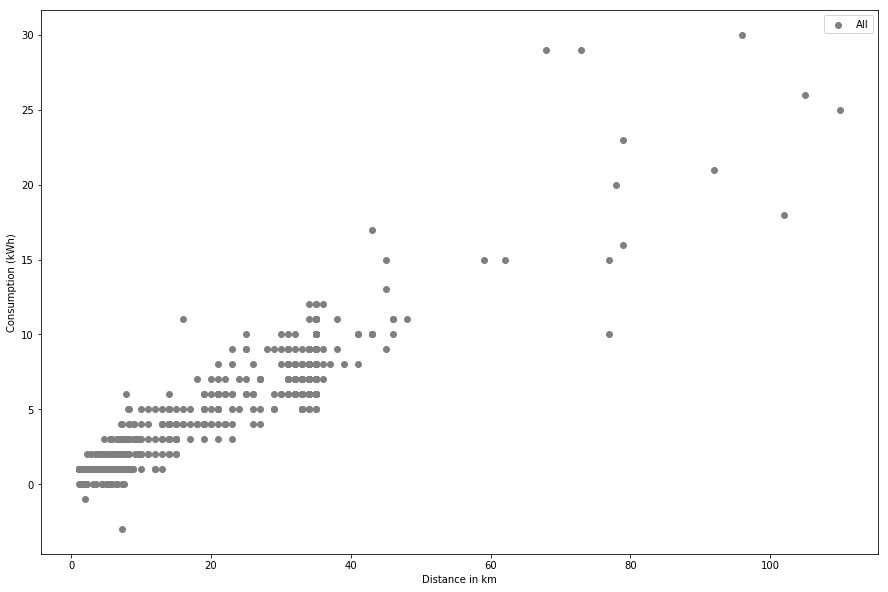

In [130]:
degree=3

plt.figure(figsize=(15,10))
plt.scatter(tesla['distance_km'], tesla['power'], label='All',  color='grey')


plt.xlabel('Distance in km')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.show()

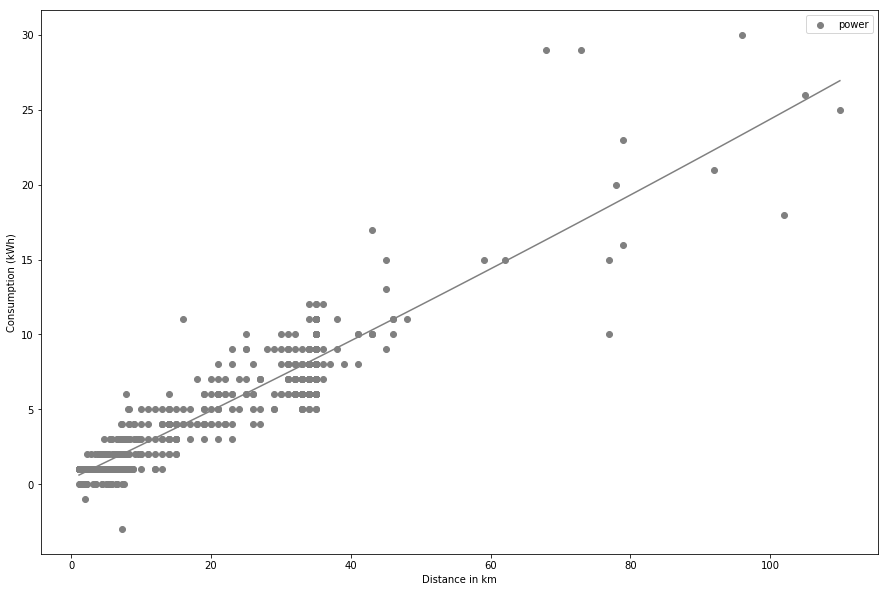

In [136]:
degree=2

plt.figure(figsize=(15,10))
plt.scatter(tesla['distance_km'], tesla['power'], color='grey')

# All
coef=np.polyfit(tesla['distance_km'], tesla['power'],degree)
x_values=np.linspace(tesla['distance_km'].min(), tesla['distance_km'].max())
y_values=np.polyval(coef, x_values)
plt.plot(x_values, y_values, color='grey')

plt.xlabel('Distance in km')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.show()

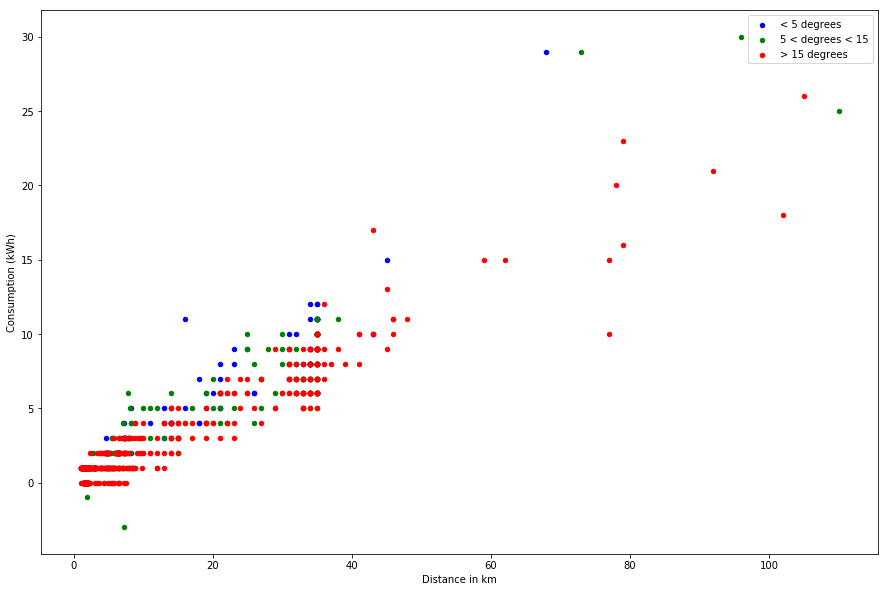

In [137]:
degree=2

plt.figure(figsize=(15,10))
plt.scatter(tesla_cold['distance_km'], tesla_cold['power'], label='< 5 degrees', s=20, color='b')
plt.scatter(tesla_mild['distance_km'], tesla_mild['power'], label='5 < degrees < 15', s=20, color='g')
plt.scatter(tesla_hot['distance_km'], tesla_hot['power'], label='> 15 degrees', s=20, color='r')


plt.xlabel('Distance in km')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.show()

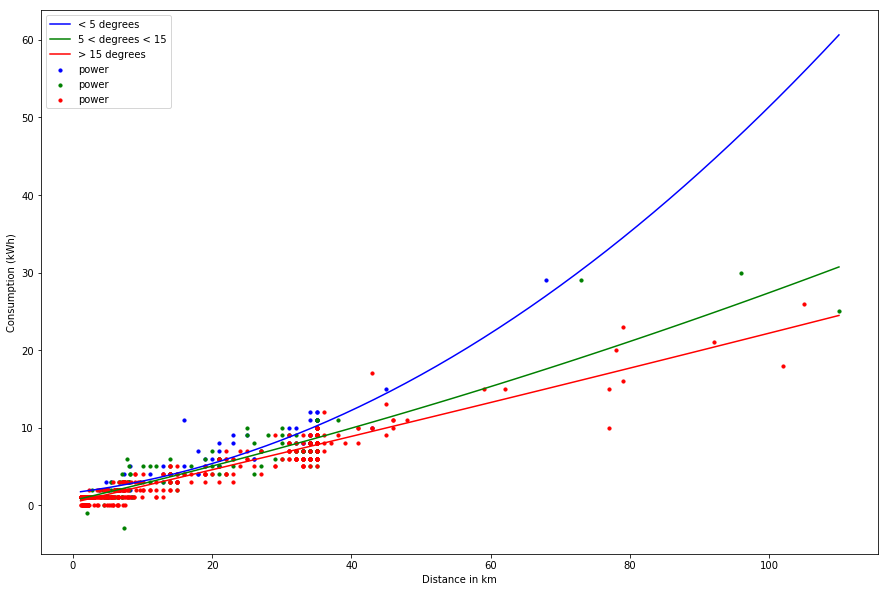

In [143]:
degree=2

plt.figure(figsize=(15,10))

plt.scatter(tesla_cold['distance_km'], tesla_cold['power'], s=10, color='b')
plt.scatter(tesla_mild['distance_km'], tesla_mild['power'], s=10, color='g')
plt.scatter(tesla_hot['distance_km'], tesla_hot['power'], s=10, color='r')

x_values=np.linspace(tesla['distance_km'].min(), tesla['distance_km'].max())

# Cold
coef=np.polyfit(tesla_cold['distance_km'], tesla_cold['power'],degree)
y_values=np.polyval(coef, x_values)
plt.plot(x_values, y_values, label='< 5 degrees', color='b')


# Hot
coef=np.polyfit(tesla_mild['distance_km'], tesla_mild['power'],degree)
y_values=np.polyval(coef, x_values)
plt.plot(x_values, y_values, label='5 < degrees < 15', color='g')


# Hot
coef=np.polyfit(tesla_hot['distance_km'], tesla_hot['power'],degree)
y_values=np.polyval(coef, x_values)
plt.plot(x_values, y_values, label='> 15 degrees', color='r')

plt.xlabel('Distance in km')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.show()

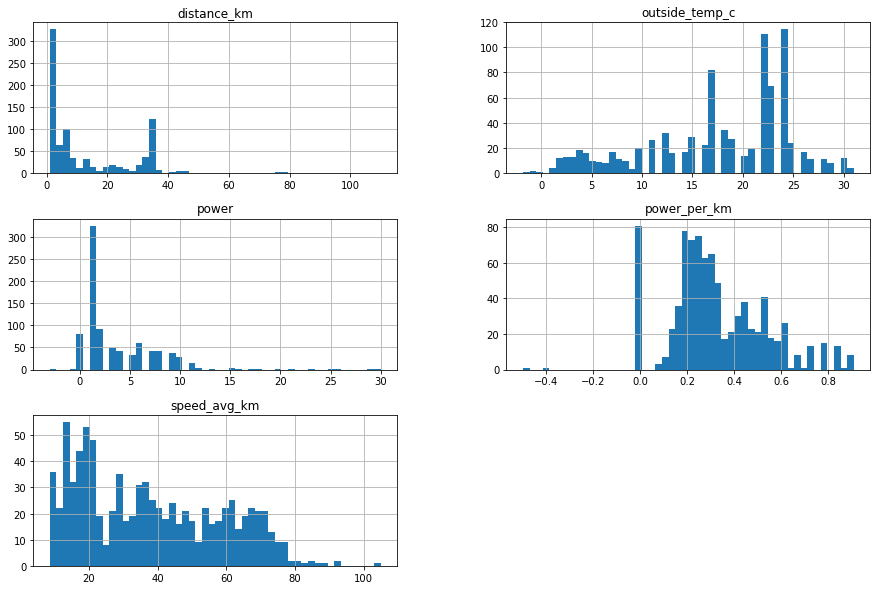

In [104]:
tesla.hist(bins=50, figsize=(15,10));